## Conditional probability

First a point about notation. If A is an event we usually abbreviate saying “probability of event A” as: P(A). When we condition on some other event occurring we add a vertical bar to say we are considering what that probability would be, if the other event occurred (note that chronological order is not important!): P(A|B) 

Note here that this is still the probability of A, and not the probability of the event A|B.

For intuition consider the diagram below: 

<div>
<img src="images/cond_prob_pebbles.png" width="500"/>
</div>


At the most left we have the total sample space with two groups of events A, and B. Then we consider P(A|B) by conditioning on B occurring, so we eliminate all of the things in A that aren’t also in B. Then on the most right we have to make sure it is still a valid probability (that it is between 0 and 1) so we normalize. 

## Joint probability

In the visual of the table we have a joint probability distirubtion. It is the probability that two **random variables** (we'll get into what a random variable means shortly) occur together. And each random variable can take on particular values. Joint probabilities can be thought of as tables for 2 random variables, cubes for 3 random variables, and "hyper-cubes" (fancy name for something we can't imagine) for 4 or more random variables. 

Going back to two random variables consider the table below, and imagine that the color black means a joint probability really close to zero, and more towards white means they have a larger joint probability:

<div>
<img src="images/joint_prob_dens.png" width="300"/>
</div>


## Conditional, Marginal Probability 


We can then consider the **joint pmf** of $X$ and $Y$ as $p(x, y) = P(X = x, Y = y)$. In other words, this is the probability of X *and* Y taking on those values. 

For a discrete random variables, we can look at joint probabilities like a table. 

Here we have $P(x, y)$ with the rows taking the x values, and columns y values 

|| | | | | 
|-|-|-|-|-| 
||**x=-2**|**x=-1**|**x=0**|**x=1**|
|**y=4**|.01 |.03 |.07 |.08 | 
|**y=5**|.03 |.07 |.14 |.07 | 
|**y=6**|.07 |.14 |.07 |.03 | 
|**y=7**|.08 |.07 |.03 |.01 |

So we can consider, say, $P( x = -2, y = 5) = 0.03$ by this lookup table. 

We can consider the **marginal pmfs** of a joint pmf, which is the probability of only one variable, regardless of the other variables' values. Concretely, this means, given joint pmf $p(x, y)$, the marginal pmf of X is $P(X = x)$ regardless of what value $Y$ takes and the marginal pmf of Y is $P(Y = y)$ regardless of what value $X$ takes. 

Mathematically, we can define this as

$P(X = x) = \sum_{y \in \mathcal{Y}} P(X = x, Y = y)$ 

$P(Y = y) = \sum_{x \in \mathcal{X}} P(X = x, Y = y)$ 

Intuitively, we can look at our table and essentially *sum* down a row or column. 

For example, given our discrete probabilities above, if we're looking for $P(X = x)$, we will sum all the rows. 

P(X = x) =  [0.19 0.31 0.31 0.19]


<BarContainer object of 4 artists>

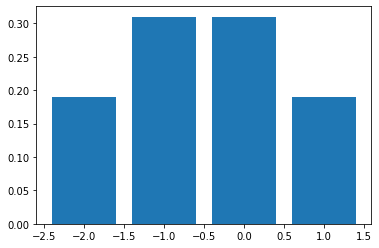

In [ ]:
P_xy = np.array([[.01, .03, .07, .08], [.03, .07, .14, .07], [.07, .14, .07, .03], [.08, .07, .03, .01]])
P_x = np.sum(P_xy, axis = 0)
print("P(X = x) = ", P_x)

plt.bar([-2, -1, 0, 1], P_x)

Note that like all pmfs, we can see that $\sum_{x \in X} p(x) = 1$


Another important pmf we can derive from joint pmfs are **Conditional PMFs.** Unlike marginal pmfs, which is the pmf for $X = x$ irrespective of the value of $Y$, conditional pmfs is the pmf for $X = x$ *given* that $Y$ is a specific value $y$. 

Mathematically, that is defined as: 

$P(X = x | Y = y) = \frac {P(X = x, Y = y)}{P(Y = y)}$

$P(Y = y | X = x) = \frac {P(X = x, Y = y)}{P(X = x)}$


Intuitively, we can calculate the conditional pmf by looking at the specific row/column for the variable we want to condition on. 

For example, if we want $P(y|x = -1)$, we will look at the second column for $x = -1$. 


|| | | | | 
|-|-|-|-|-| 
||**x=-2**|**x=-1**|**x=0**|**x=1**|
|**y=4**|.01 |**.03** |.07 |.08 | 
|**y=5**|.03 |**.07**  |.14 |.07 | 
|**y=6**|.07 |**.14** |.07 |.03 | 
|**y=7**|.08 |**.07** |.03 |.01 |

But note that the column doesn't sum to 1-- we need to scale the column's values by the marginal pmf $P(x = -1)$. This is the intuition behind the mathematical definition of the conditional pmf, i.e. 

$P(Y = y|x = -1) = \frac{P(y, x = -1)}{P(x = -1)}$

From our earlier example, we know $P(x = -1) = 0.31$, so we just need to take our column and scale it by the marginal probability.  

In [ ]:
P_y_given_x = P_xy[:,1] / 0.31
print("P(Y = y | x = -1) = ", P_y_given_x)

P(Y = y | x = -1) =  [0.09677419 0.22580645 0.4516129  0.22580645]


# Probability Algebra

## The product (also called chain) rule of probability

If we are considering the probability of two random variables in tandem we write this down as: $P(A, B)$

In probability theory there is a rule we can apply referred to the product rule, or the chain rule that allows us to rewrite $P(A, B)$ as: 

$$P(A, B) = P(A|B)P(B)$$

in addition we should note that the application of this rule is symmetric in the sense that we could have also written:

$$P(A, B) = P(B|A)P(A)$$

later you'll learn, or as you'll remember, this symmetry allows you to write down conditional probabilities in terms of **likelihoods, priors, and marginals** 

* Write down what the application of the product rule to $P(X, Y)$ gives. (Write this down both ways as above)
* Equate both ways of writing down $P(X, Y)$ after applying the product rule to each other and manipulate the equation such that only one statement of $P(\cdot)$ is on either the left or right side. Do this 3 different ways

## Independence

If two random variables are independent, then when we apply the chain rule, we no longer need to condition: 

$$P(A, B) = P(A)P(B)$$

This is telling us that no matter our choice of $A$, $P(B)$ is unchanged (and vice versa).

Imagine that $A$ is the random variable for the sidewalk being wet. Further imagine that $B$ is the random variable for it raining. Now imagine this is in a strange planet where sidewalks deflect rain back to the sky (but they can still get wet if say, you dropped a tea drink on the sidewalk). This means that the sidewalk being wet is completely independent of it raining, because no matter if it rains, by the magical property of the sidewalk, this will never cause it to get wet. As for the other direction, when the sidewalk deflects the rain back up, the rain then goes to another dimension, and this has the consequence of having no consequence on whether it rains again or not. And so again, the probability of it raining is independent of the sidewalk being wet. 

Why did we need that last clause? Well because if the sidewalk being dry DID have an impact on the probability of it raining, then we could not say that $P(B|A) = P(B)$, because $A$ contains the values {wet, not-wet}, and so $B$ must be indpendent of all values for which $A$ can become.



This is less a point of technicality, rather more on the side of interpretation. It is very much in line with how we should think of $P(A|B)$ as only a function of $A$. Said another way, $P(A|B)$ should hold the same meaning as $P(X)$ in the sense that we are only considering the distribution over one variable, the one to the left of the verticle bar (and when there is only one variable you can imagine there is a verticle bar, with some prior information being conditioned on). 

Keeping this view in mind, then it is easy to apply the chain rule while holding a conditioning set constant: 

$$P(A, B | C) = P(A|B, C)P(B|C)$$


* Write down what $P(X, Y| A, C)$ is aftering using the product rule to expand it as a product of 2 terms (e.g. the answer should be of the form: $P(X, Y| A, C) = P(\cdot)P(\cdot)$

_hint: treat (A, C) = D and rewrite the relation above_

## Manipulation with Bayes rule

Bayes rule tells you how to compute a particular conditional probability, from a different conditional probability, in particular if we want $P(A|B)$ but only have $P(B|A)$ (and a some additional information) we can use Bayes rule to get at the desired quantity. Using: 

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

some things to note, in modeling: 

$P(A)$ is often called the prior

$P(B|A)$ is often called the likelihood 

$P(B)$ is often called the marginal evidence

$P(A|B)$ is called the posterior

* Use Bayes rule to write down $P(Z|Y)$ as a product of the likelihood and prior, divided by the marginal evidence

At the risk of beating a dead horse, let's try to give the different variables in Bayes rule a bit of meaning to help us remember how to apply it in general. 

$P(A|B)$ considers the probability of $A$, after incorporating the information about $B$.

$P(B|A)$ is the current evidence for $B$, taking into acount what we know about some particular aspect of $A$

$P(A)$ is our prior knowledge of some particular aspect of $A$

$P(B)$ is a marginal probability, where we have "marginalized out" $A$, that is, it is $P(B|A)P(A)$ for all possible values of $A$

## Using Bayes theorem to infer the probability of a biased coin

Here's the scenario, we have a biased coin that comes up heads roughly 46 % of the time and tails the rest. We're going to use the knowledge of some of the distributions we just learned about to try and figure out this bias, using random samples of data. To do this we'll use Bayes rule, as it will tell us exactly how to do it. 

If we want to write down this task in the usual notation we have to define some terms:

$h = heads$ = head bias

$t = tails$ = tail bias

$b = belief$ = prior belief of heads

$d = data$ = set of data points

$$P(belief|data) = \frac{P(data|belief)P(belief)}{\int P(data|belief)P(belief) \mathop{d belief}}$$

and more compactly as:

$$P(b|d) = \frac{P(d|b)P(b)}{\int P(d|b)P(b) \mathop{d b}}$$


let's step through this one data sample at a time:

We have some prior belief for the bias of the coin, this prior belief is encoded in a Beta distribution (because we say we believe the coin will come up heads some % of the time and that % must be between 0 and 1). this distribution has the form: 

$$P(b) = P(b| \alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)} b^{\alpha - 1}(1-b)^{\beta -1 }$$

Then we get a data point, we toss the coin. As we learned above the distribution of a coin is a Bernoulli so we can also write: 

$$P(d|b) = b^d(1-b)^{(1-d)}$$


Now just as we see in Bayes theorem, these two terms are being multiplied. So we can do the same:

$$\Big( b^d(1-b)^{(1-d)} \Big) \Big(\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)} b^{\alpha - 1}(1-b)^{\beta -1 }\Big)$$

OK, so now we have to mention that using Beta and Bernoulli distributions in this fashion is actually a special case where Bayes rule works out nicely enough to be done with pure algebra. Usually, we can't do what we are about to do because the functions of the different terms don't have the same form as they do above. Notice:

$P(d|b)$ has $b^d$, and $P(b)$ has $b^{\alpha-1}$ that means (by the rules of exponents): 

$$b^d \times b^{\alpha-1} = b^{d + \alpha - 1}$$

and again: $P(d|b)$ has $(1-b)^{1-d}$ and $P(b)$ has $(1 - b)^{\beta - 1}$ , so:

$$(1-b)^{1-d} \times (1 - b)^{\beta - 1} = (1 - b)^{1-d + \beta - 1}$$

if we combine these steps we get 

$$b^{d + \alpha- 1}(1-b)^{1 - d + \beta - 1}$$

again, please notice that in $d + \alpha - 1$, this is exactly  $\alpha - 1$ in the original case, if we define: $\alpha' = d + \alpha$, then we have $b^{\alpha' - 1}$

and in $1 - d + \beta -1$, we can define: $\beta' = 1 - d + \beta$, so  we have again the original form of $(1-b)^{\beta' - 1}$

at this point we can see that this result is exactly a Beta distribtuion of the form: 

$$P(b|d) =  \frac{\Gamma(\alpha')\Gamma(\beta')}{\Gamma(\alpha' + \beta')} b^{\alpha' - 1}(1-b)^{\beta' -1 }$$

the above suggests something, and that's basically that we only need to keep track of $\alpha'$ and $\beta'$, as new data come in. So long as we keep track of this, we can plug these new paramters into the form of a Beta distribution. So how do we keep track of this? Well as we just saw:

* We add the new sample to the previous $\alpha$
* We add 1 minus the new sample to the preveious $\beta$

OK, thats great and all, but what was the task? It was to infer the bias of the coin. However what we've arrived at is how to get to the function of the posterior distribution for that bias. What if I said, just give me one number, of what that you think that bias might be after observing all the data. What would be the correct thing to give me? One obvious answer is, it's the number between 0 and 1 for which our $P(b|d)$ function gives the highest output. And it turns out that this number will be: 

$$b = \frac{\alpha'}{\alpha' + \beta'}$$

Text(0.65, 6, 'true head bias= 0.46\nestimated head bias = 0.411')

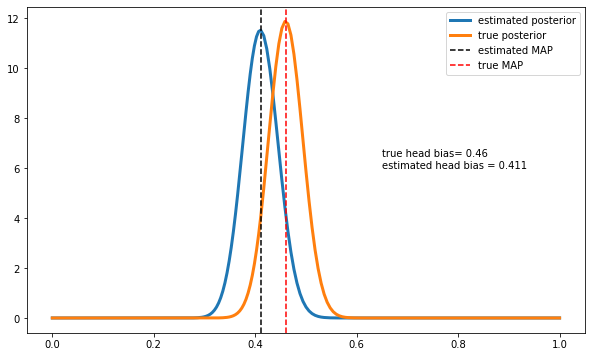

In [ ]:
np.random.seed(3434)

head_bias = 0.46

sampleDistribution = bernoulli(head_bias)

# apriori, we have no reason to expect that the coin is biased in any way
# so we assume it's fair and say we believe that head and tail both come up in equal proportions
num_heads, num_tails = 1, 1

# change this number and re-run this code to see how the plot varies
n_samples = 200

data = sampleDistribution.rvs(n_samples)

for sample_idx in range(n_samples):
    num_heads += data[sample_idx]
    num_tails += 1 - data[sample_idx]

# this is alpha' / (alpha' + beta') in the explanation above   
best_posterior_point_estimate = num_heads / (num_heads + num_tails)
 
from scipy.stats import beta
posteriorBeta = beta(num_heads, num_tails)
x = np.concatenate([np.linspace(start=0, stop=best_posterior_point_estimate, num=100),
                   np.linspace(start=best_posterior_point_estimate, stop=1, num=100)])

plt.figure(figsize=(10, 6))
plt.plot(x, posteriorBeta.pdf(x), lw=3)
plt.plot(x, beta(num_heads+18.5, num_tails).pdf(x), lw=3)
plt.axvline(best_posterior_point_estimate, linestyle="--", color="black")
plt.axvline(head_bias, linestyle="--", color="red")
plt.legend(["estimated posterior", "true posterior", "estimated MAP", "true MAP"])
plt.annotate(xy=(0.65, 6), s=f"true head bias= {head_bias}\nestimated head bias = {round(best_posterior_point_estimate, 3)}")

## How to get from individual samples to an entire dataset

There are no more problems to do here, I just want to explain how we relate entire datasets, to the procedure we've applied above. 


In both the coin flip example and the spiking neuron example we looked at each sample of data individually, one at a time. How this relates to an entire dataset can be a little opaque. Usually instead of a single point, you'll have a dataset of points which you'll denote with a capital letter (for now let's say by convention we'll use lowercase for points and uppder case for datasets): $D$

If we use this in our notation for Bayes rule we have:

$$P(\lambda | D) = \frac{P(D|\lambda)P(\lambda)}{P(D)}$$

so can we just use the entire dataset in the same way? Well, first let's break this down a little more.

We know that $D$ contains all data points, so if we index a data point with the parameter $t$, we can rewrite $D$ as:

$$D = (d_1, d_2, ... d_t, d_{t+1}, ..., d_N)$$

Lets plug this into Bayes rule:


$$P(\lambda|d_1, d_2, ... d_t, d_{t+1}, ..., d_N) = \frac{P(d_1, d_2, ... d_t, d_{t+1}, ..., d_N|\lambda)P(\lambda)}{P(d_1, d_2, ... d_t, d_{t+1}, ..., d_N)}$$

we can also abbreviate the above to make it easier to read by saying (and you might see some people write it this way):

$$d_{1:N} = (d_1, d_2, ... d_t, d_{t+1}, ..., d_N)$$

but for now, to avoid too much remapping of terms let's stick with $D = (d_1, d_2, ... d_t, d_{t+1}, ..., d_N)$.

To get from a single datapoint as we did above, where $k$ is one data point in the spiking neuron example we use an assumption of independence. And in particular, conditional independence. We say, by conditioning on the rate parameter $\lambda$, we can break up each data point, and treat them as indpendent of one another. This transforms the above definition for the entire dataset, using Bayes rule into (**note that all we're doing below is using the same principle we learned about at the start of this notebook**):

$$P(\lambda|d_1, d_2, ... d_t, d_{t+1}, ..., d_N) = \frac{P(d_1, d_2, ... d_t, d_{t+1}, ..., d_N|\lambda)P(\lambda)}{P(d_1, d_2, ... d_t, d_{t+1}, ..., d_N)} = \prod_{t=1}^N \frac{P(d_t|\lambda)P(\lambda)}{P(d_t)}$$


technically our estimate of $\lambda$ is changing aswell but for now we won't index it. To stop myself from writing a book, I'll leave it here and encourage you all to plug in the individual terms (as in the coin flip example or the spiking neuron example) for $P(d_t|\lambda)$ and $P(\lambda)$, and do the algebra to see that we infact still arrive at the same answer.